In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
df = pd.read_csv('measurement.csv')
df['time_log'] = df['Time (best of 3)'].apply(np.log10)
df['n_log'] = df['N'].apply(np.log10)
df.sample(10)

,System,Task,Parallel,N,Time (best of 3),time_log,n_log
24,"15"" MB",dask_graph,Yes,1000,0.25,-0.602060,3.000000
4,"12"" MB",make_data,Yes,2000,5.50,0.740363,3.301030
31,"15"" MB",actual_task,No,1000,3.20,0.505150,3.000000
30,"15"" MB",actual_task,Yes,1000,1.90,0.278754,3.000000
34,"15"" MB",actual_task,No,15000,51.00,1.707570,4.176091
23,"15"" MB",dask_graph,No,10000,0.62,-0.207608,4.000000
28,"15"" MB",actual_task,Yes,85742,216.00,2.334454,4.933194
14,"15"" MB",make_data,No,1000,9.60,0.982271,3.000000
16,"15"" MB",make_data,No,5000,37.40,1.572872,3.698970
5,"12"" MB",make_data,Yes,5000,14.20,1.152288,3.698970


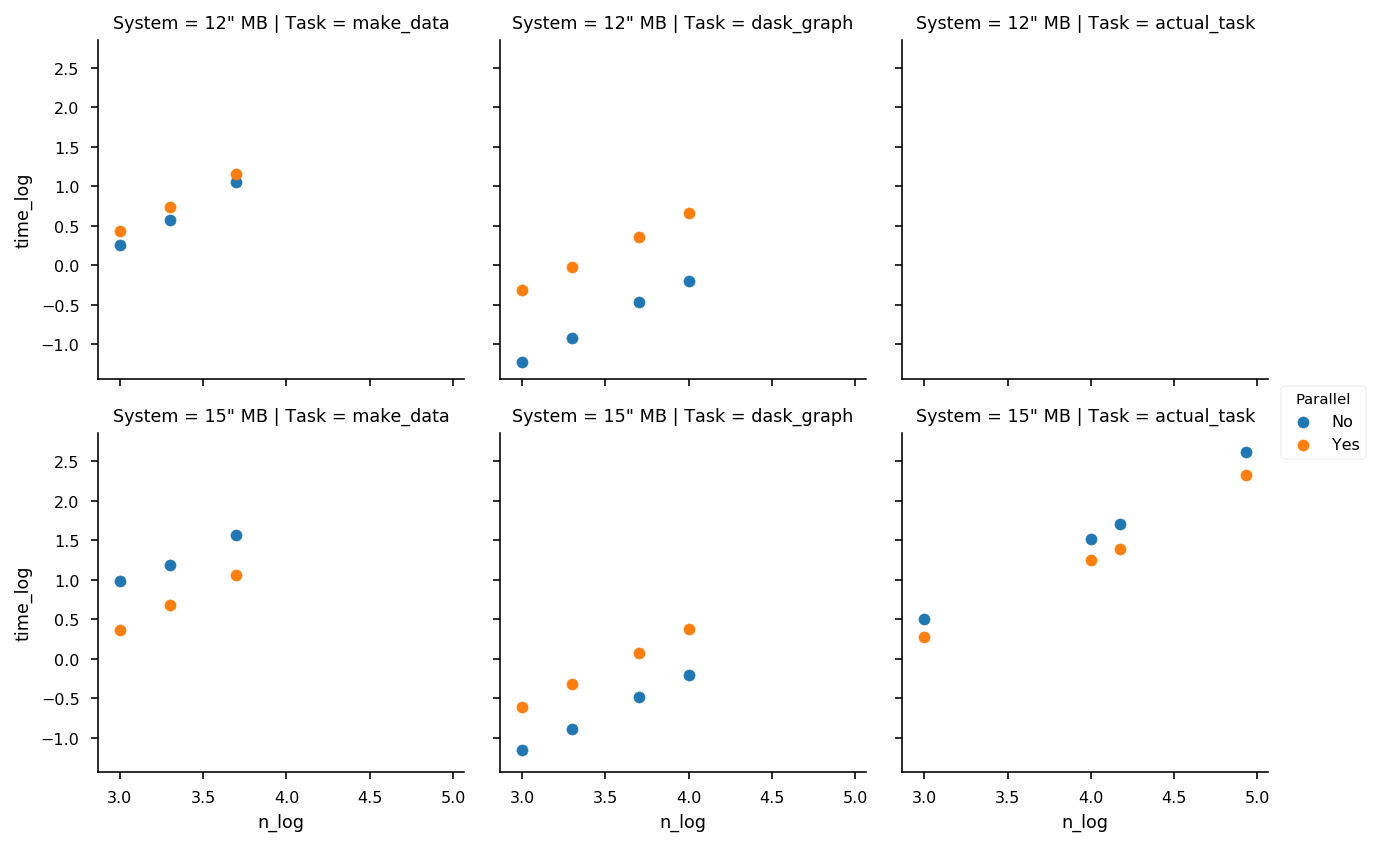

In [60]:
g = sns.FacetGrid(df, col='Task', row='System', hue="Parallel")
g = g.map(plt.scatter, "n_log", "time_log").add_legend()